# **Aprendizaje supervisado**
# SL16. Tarea Final

A continuación se entregan una serie de datasets. Para cada uno de ellos construya TRES (3) modelos de aprendizaje supervisado y compare sus resultados.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier # Usa muestreo boostrap

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


## <font color='blue'>**Set de Datos Boston Housing**</font>

El objetivo es poder predecir a nivel de negocio, el valor promedio de una propiedad en miles de dólares (US$1000) en la ciudad de Boston y que corresponde a la variable **MEDV**.

Informacion de los atributos   
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per \$10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    \% lower status of the population
14. MEDV     Median value of owner-occupied homes in \$1000's (target)

1. Realice 3 visualizaciones con los datos.

2. Pruebe todos los modelos disponibles para el problema de regresión. Reporte las medidas de ajuste de regresion de 20 corridas experimentales con 5 fold cross validation.

<font color='red'>**1) SOLUCIÓN PROBLEMA 1:**</font>

**1)** Antes de iniciar el proceso de estimación, se analizarán los datos, en particular:

*   Se revisará la existencia de datos nuloS y duplicados.
*   Identificación de atípicos y eliminación de ellos.
*   Visualización de los Datos.


In [ ]:
#Lee un archivo CSV directamente de una URL y guarda los resultados
url='https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
names=['CRIM','ZN','INDUS','CHAS','NOS','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df = pd.read_csv(url,delimiter='\s+', header=None, names=names)
#data = pd.read_csv(url,delim_whitespace=True, header = None)

# Muestra las 5 primeras filas
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
#Numero de propiedades
print(f'{df.shape[0]}')

506


In [ ]:
#Tipo de dato de las variables
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOS        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [ ]:
#Tabla de resumen (medidas estadísticas básicas)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


La data contiene información sobre 506 propiedades y todas las variables (columnas) son variables numéricas.



In [ ]:
#Datos nulos
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOS        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

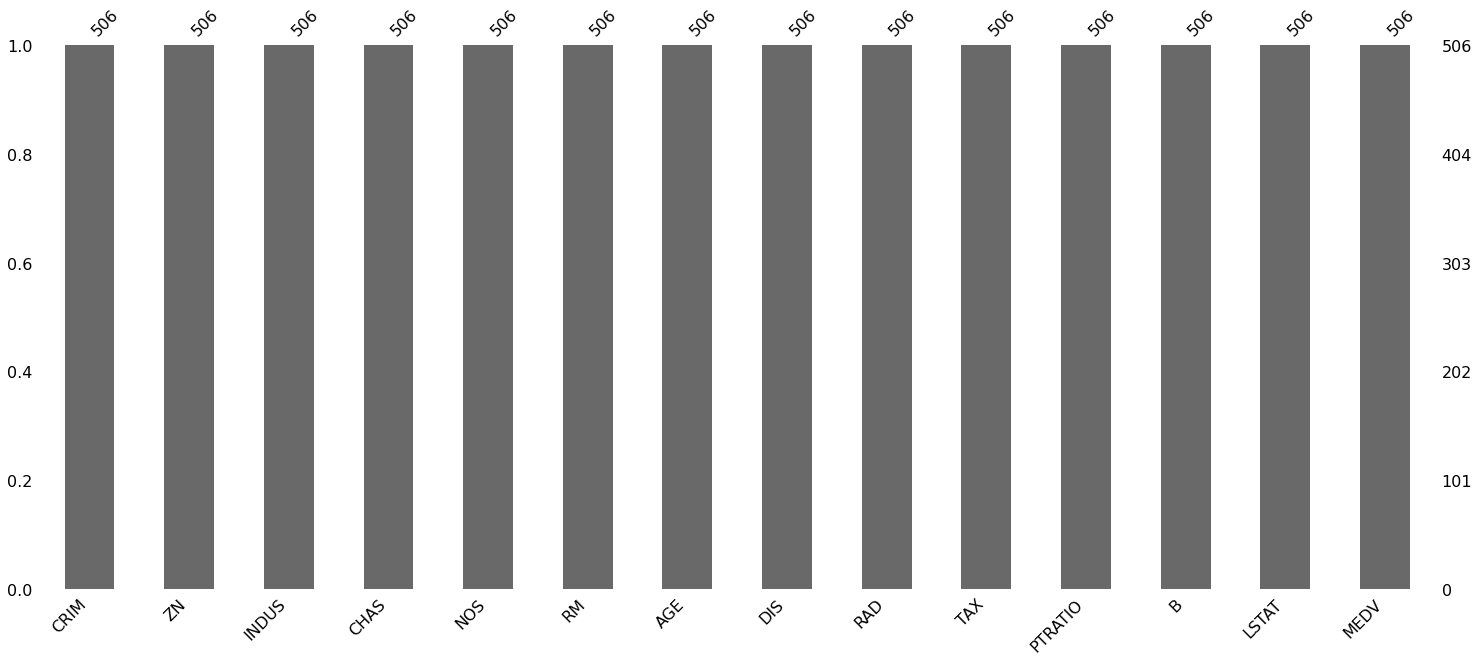

In [ ]:
#Alternativa

#Una forma de visualizar la existencia de datos nulos o faltantes es haciendo uso de
import missingno as msno
%matplotlib inline
msno.bar(df)
plt.show()

In [ ]:
#Datos Duplicados
df.drop_duplicates()

,CRIM,ZN,INDUS,CHAS,NOS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


No hay datos nulos ni duplicados.

In [ ]:
#Se genera una copia a modo de respaldo
df1=df.copy()

La naturaleza multidimensional de los datos permite abordar la identificación de atípicos haciendo uso de DBSCAN. Sin embargo, dada la cantidad de variables que participan en el problema, antes de aplicar DBSCAN se simplificará la  complejidad de éste pero se conservará toda su información, y se hará por medio del método estadístico: Principal Component Analysis (PCA).

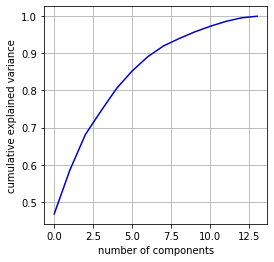

Con 4 componentes, se obtiene el 0.8058476226454749 de varianza explicada
Dimensiones iniciales: (506, 14)
Dimensión de la proyección: (506, 4)


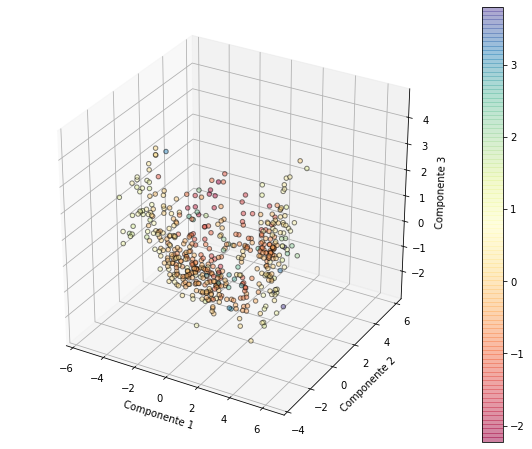

Aquí el color representa la Componente 4


In [ ]:
#PCA

#Primero se analizara la cantidad de componentes/variables/dimensiones necesarias
# para que acumulen a lo menos el 80% de la varianza. 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df1.to_numpy() 

# Normalización de las variables
X = StandardScaler().fit_transform(X)

#PCA
pca = PCA().fit(X)
fig = plt.figure(figsize=(4,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color="mediumblue")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()
pos_80 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.8)
print(f'Con {pos_80} componentes, se obtiene el {np.cumsum(pca.explained_variance_ratio_)[pos_80]} de varianza explicada')

#PCA con n=pos_80
pca = PCA(n_components=pos_80)
projected = pca.fit_transform(X)
print(f'Dimensiones iniciales: {X.shape}')
print(f'Dimensión de la proyección: {projected.shape}')

#VISUALIZACIÓN 1
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(projection='3d')
im = ax.scatter(projected[:, 0], projected[:, 1],projected[:, 2],
            c=projected[:, 3], edgecolor='black', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral',100))
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
fig.colorbar(im, ax=ax)
plt.grid()
plt.show()

print(f'Aquí el color representa la Componente 4')

Ahora, se hará uso de DBSCAN para identificar los puntos atipicos en base a las componentes principales.

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


eps óptimo: 1.068038057236379


<Figure size 288x288 with 0 Axes>

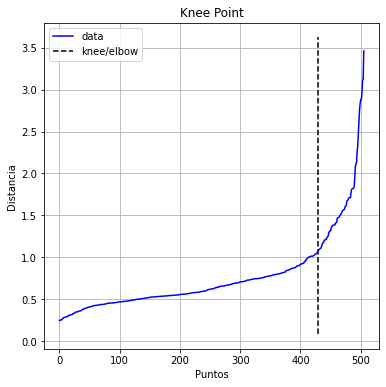

In [ ]:
from IPython.display import display
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

warnings.filterwarnings('ignore')
%matplotlib inline

X = projected

# DBSCAN con eps y min_samples arbitrarios
db = DBSCAN(eps=0.11, min_samples=5).fit(X)

# Identificación del eps óptimo
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,5], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(4, 4))
knee.plot_knee()
plt.xlabel("Puntos")
plt.ylabel("Distancia")
print(f"eps óptimo: {distances[knee.knee]}")
plt.grid()
plt.show()

Los datos se visualizan en el siguiente grafico: Age v/s MEDV, en donde los atípicos son aquellos puntos en el cluster -1.

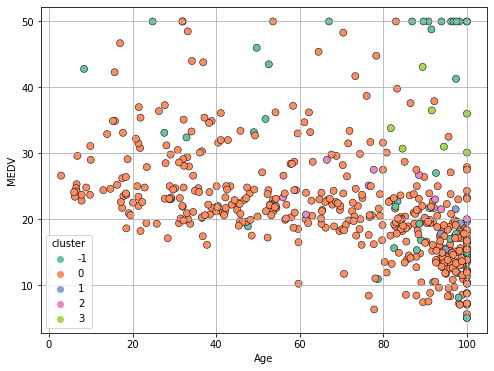

In [ ]:
#VISUALIZACION 2

#DBSCAN con eps optimo
db = DBSCAN(eps=distances[knee.knee], min_samples=5).fit(X)
labels = db.labels_

#A la tabla de datos se agrega una columna que indica el cluster (cluster -1 es atipico)
df1.loc[:,"cluster"]=labels

#Grafico
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x="AGE",y="MEDV", data=df1, hue="cluster",palette="Set2",s=50,linewidth = 0.5,edgecolor="black")
plt.xlabel("Age")
plt.ylabel("MEDV")
plt.grid()
plt.show()

Se eliminan los datos atípicos:

In [ ]:
#Se eliminan los datos con cluster -1:
df2 = df1[df1["cluster"] != -1]
print(f"Se eliminaron {df1.shape[0]-df2.shape[0]} datos, quedan {df2.shape[0]}.")

Se eliminaron 40 datos, quedan 466.


Por otro lado, se analiza la correlación lineal de Pearson entre las variables por medio de una matriz de correlación:

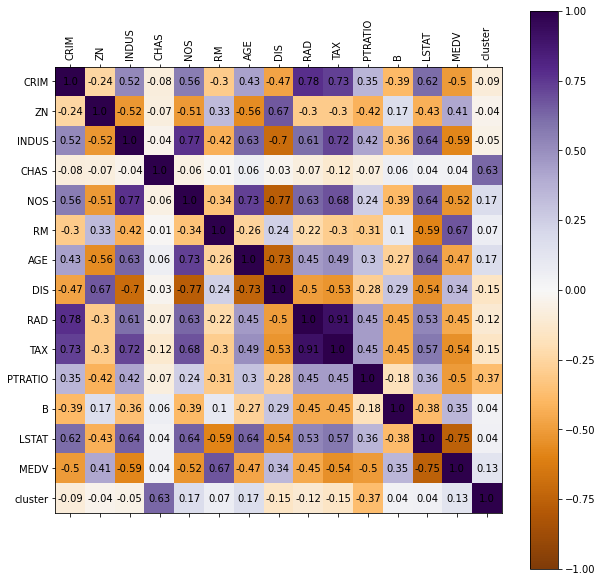

In [ ]:
matriz=df2.corr(method='pearson')
plt.rcParams['figure.figsize'] = (10,10);
plt.matshow(matriz, cmap='PuOr', vmin=-1, vmax=1)
plt.xticks(range(df1.shape[1]), df1.columns, rotation=90)
plt.yticks(range(df1.shape[1]), df1.columns)

for i in range(len(matriz.columns)):
      for j in range(len(matriz.columns)):
            plt.text(i, j, round(matriz.iloc[i, j], 2),
            ha="center", va="center")
plt.colorbar()
plt.grid(False)
plt.show()

De la matriz se observa que las variables NOS-INDUS (0.77) y RAD-CRIM (0.78) presentan la mayor correlacion positiva, en cambio, las variables MEDV-LSTAT (-0.75) y NOS-DIS (-0.77) presentan la mayor correlacion negativa. Se grafican estas relaciones:

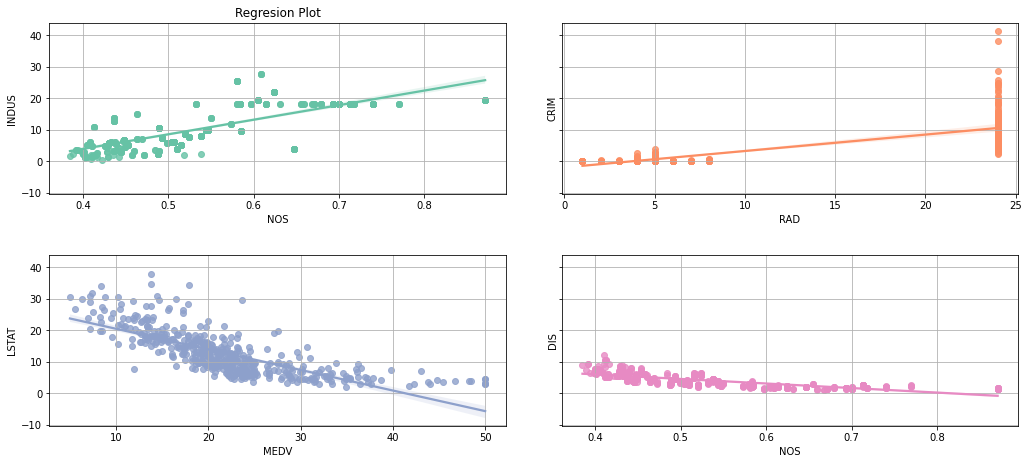

In [ ]:
#VISUALIZACION 3

fig, ax = plt.subplots(2,2, figsize=(15,7), sharey=True)
fig.tight_layout(pad=4.0)
colormap=sns.color_palette("Set2",4).as_hex()

#NOS nitric oxides concentration (parts per 10 million)
#INDUS proportion of non-retail business acres per town
sns.regplot(x='NOS', y='INDUS', data=df2, color=colormap[0],ax=ax[0,0])
ax[0,0].set_xlabel("NOS")
ax[0,0].set_ylabel("INDUS")
ax[0,0].set_title("Regresion Plot")
ax[0,0].grid()

#CRIM per capita crime rate by town
#RAD index of accessibility to radial highways
sns.regplot(x='RAD', y='CRIM', data=df2, color=colormap[1],ax=ax[0,1])
ax[0,1].set_xlabel("RAD")
ax[0,1].set_ylabel("CRIM")
ax[0,1].grid()

#LSTAT % lower status of the population
#MEDV Median value of owner-occupied homes in $1000's (target)
sns.regplot(x='MEDV', y='LSTAT', data=df2, color=colormap[2],ax=ax[1,0])
ax[1,0].set_xlabel("MEDV")
ax[1,0].set_ylabel("LSTAT")
ax[1,0].grid()

#NOS nitric oxides concentration (parts per 10 million)
#DIS weighted distances to five Boston employment centres
sns.regplot(x='NOS', y='DIS', data=df2, color=colormap[3],ax=ax[1,1])
ax[1,1].set_xlabel("NOS")
ax[1,1].set_ylabel("DIS")
ax[1,1].grid()
plt.show()

Por último se grafica un histograma para cada variable del problema:

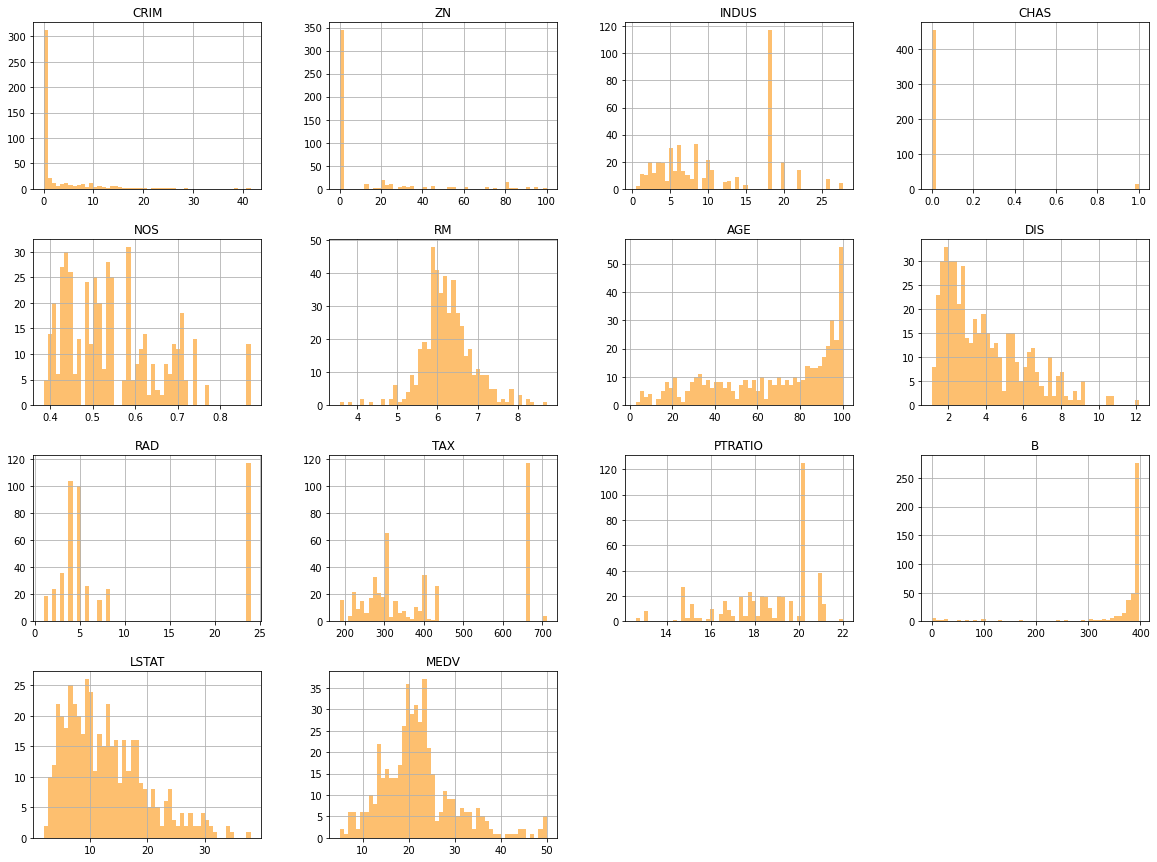

In [ ]:
#VISUALIZACION 4
plt.rcParams['figure.figsize'] = (20,15)
colormap=sns.color_palette("Paired",8).as_hex()
df2.iloc[:,0:14].hist(bins=50,color=colormap[6])
plt.grid()
plt.show()

**2**)

La estimación de MEDV se hará a través de tres algoritmos:

1.   Regresión Lineal
2.   Regresión Lineal-Lasso
3.   Gradient Boosting

y se procederá de la siguiente manera:

a) de las 13 variables independientes se obtendrá  la cantidad $n$ de componentes principales (por medio de PCA).

b) luego con MutualInformation se identificarán cuales son esas $n$ componentes principales y con ellas se hará la estimación.

c) como se pide, se harán 20 corridas experimentales con 5 cross_validation  y para cada corrida se medirá el MSE, RMSE y R2 para cada modelo de regresión (LinearRegression, LassoLinearRegression y GradientBoosting). Además en cada corrida se usará GridSearchCV para identificar el hiperparámetro $\alpha$ de LassoLinearRegression. Aquí, a GradientBoosting también se le podría aplicar GridSearchCV para encontrar la configuración óptima de hipeparámetros (  'learning_rate','max_depth','max_features') pero para satisfacer las 20 corridas y obtener un tiempo de ejecución razonable, se escoge no hacerlo.


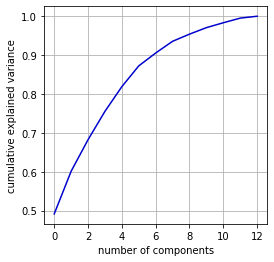

Con 4 componentes, se obtiene el 0.8189152205004572 de varianza explicada
Dimensiones iniciales: (466, 13)
Dimensión de la proyección: (466, 4)


In [ ]:
#a) 
X = df2.iloc[:,0:13].to_numpy()

# Normalización de las variables
X = StandardScaler().fit_transform(X)

#PCA
pca = PCA().fit(X)
fig = plt.figure(figsize=(4,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_),color="mediumblue")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()
pos_80 = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.8)
print(f'Con {pos_80} componentes, se obtiene el {np.cumsum(pca.explained_variance_ratio_)[pos_80]} de varianza explicada')

#PCA con n=pos_80
pca = PCA(n_components=pos_80)
projected = pca.fit_transform(X)
print(f'Dimensiones iniciales: {X.shape}')
print(f'Dimensión de la proyección: {projected.shape}')

In [ ]:
#b)
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df2.iloc[:,0:13].to_numpy()
y = df2.iloc[:,13].to_numpy()

# Instanciamos el objeto SelectKBest 
skb = SelectKBest(score_func=f_regression,k=pos_80)         

# Train y transform el dataset en base a SelectKBest
X_data_new = skb.fit_transform(X, y)

# Imprmimimos
print(f'Número de características antes de la selección: {X.shape[1]}')
print(f'Número de características después de la selección: {X_data_new.shape[1]}')

# Imprimir el nombre de las características seleccionadas
print("Las variables seleccionadas son:")
for feature_list_index in skb.get_support(indices=True):
    print("-"+ df2.columns[feature_list_index])

Número de características antes de la selección: 13
Número de características después de la selección: 4
Las variables seleccionadas son:
-INDUS
-RM
-TAX
-LSTAT


luego para estimar el MEDV de la propiedad sólo es necesario obtener información de estos 4 atributos: INDUS, RM, TAX, LSTAT.

In [ ]:
#c) 
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

#Separación en variables independientes (X) y variable dependiente (y):
X = df2[["INDUS","RM","TAX","LSTAT"]]
y = df2[["MEDV"]].to_numpy()

#Escalamiento de los datos:
scl1= StandardScaler().fit(X) 
X = scl1.transform(X)    

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#Se crean variables para guardar las medidas de ajuste y los modelos
lr_mse=[]
lr_rmse=[]
lr_r2=[]
Llr_mse=[]
Llr_rmse=[]
Llr_r2=[]
GB_mse=[]
GB_rmse=[]
GB_r2=[]
LR={}
LLR={}
GB={}

#20 corridas con 5 crossvalidation cada una

for i in range(0,20):
    mse1=[]
    rmse1=[]
    r21=[]
    mse2=[]
    rmse2=[]
    r22=[]
    mse3=[]
    rmse3=[]
    r23=[]

    kf = KFold(n_splits=5, shuffle=True)
    for k, (train_index, test_index) in enumerate(kf.split(X,y)):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            #Linear Regression
            lr = linear_model.LinearRegression()
            lr.fit(X_train, y_train)
            y_pred1 = lr.predict(X_test)
            mse1.append(mean_squared_error(y_test,y_pred1))
            rmse1.append(np.sqrt(mse1[k]))
            r21.append(r2_score(y_test, y_pred1))

            #Linear Lasso Regression
            param_grid = {'alpha': [1.0,0.8,0.5,0.3,0.1]}
            Llr = linear_model.Lasso()
            Llr_cv = GridSearchCV(Llr, param_grid, scoring='neg_mean_squared_error').fit(X_train, y_train) 
            Llr.set_params(**Llr_cv.best_params_)
            Llr.fit(X_train, y_train)
            y_pred2 = Llr.predict(X_test)
            mse2.append(mean_squared_error(y_test,y_pred2))
            rmse2.append(np.sqrt(mse2[k]))
            r22.append(r2_score(y_test, y_pred2)) 

            #GradientBoosting
                #param_grid = {'learning_rate': [],'max_depth': [],'max_features': []}
            gb = GradientBoostingRegressor(n_estimators=300,max_depth=6,max_features=4,learning_rate=0.1,loss='ls')
            gb.fit(X_train, y_train)
            y_pred3 = gb.predict(X_test)
            mse3.append(mean_squared_error(y_test,y_pred3))
            rmse3.append(np.sqrt(mse3[k]))
            r23.append(r2_score(y_test, y_pred3))

    #Se guardan los promedio de las medidas.
    lr_mse.append(np.mean(mse1))
    lr_rmse.append(np.mean(rmse1))
    lr_r2.append(np.mean(r21))
    Llr_mse.append(np.mean(mse2))
    Llr_rmse.append(np.mean(rmse2))
    Llr_r2.append(np.mean(r22))
    GB_mse.append(np.mean(mse3))
    GB_rmse.append(np.mean(rmse3))
    GB_r2.append(np.mean(r23))
    #Se guarda el ultimo modelo del crossvalidation
    LR[i]=lr
    LLR[i]=Llr
    GB[i]=gb

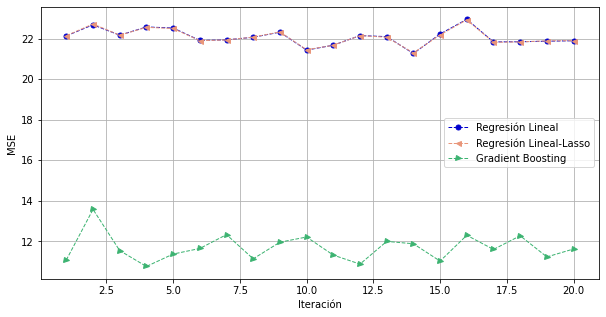

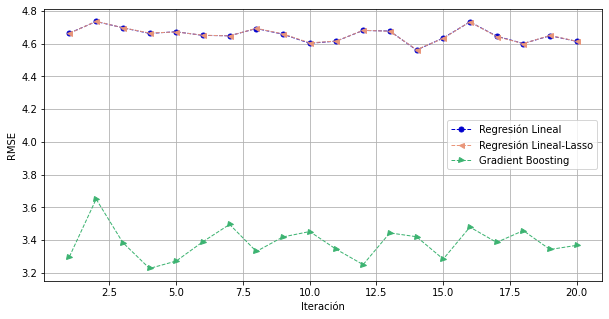

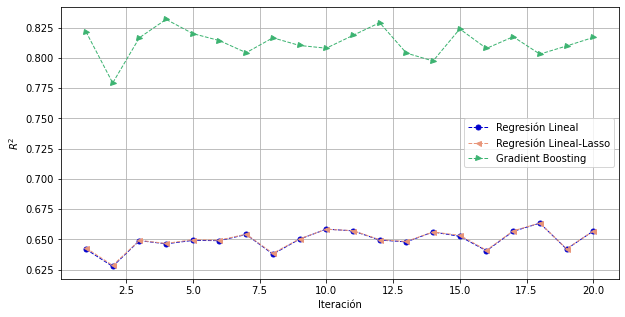

In [ ]:
#Gráficos
plt.rcParams['figure.figsize'] = (10,5)
plt.plot(range(1,21),lr_mse,color="mediumblue",label="Regresión Lineal",marker='o', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),Llr_mse,color="darksalmon",label="Regresión Lineal-Lasso",marker='<', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),GB_mse,color="mediumseagreen",label="Gradient Boosting",marker='>', linestyle='dashed',linewidth=1, markersize=5)
plt.ylabel("MSE")
plt.xlabel("Iteración")
plt.legend()
plt.grid()
plt.show()

plt.rcParams['figure.figsize'] = (10,5)
plt.plot(range(1,21),lr_rmse,color="mediumblue",label="Regresión Lineal",marker='o', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),Llr_rmse,color="darksalmon",label="Regresión Lineal-Lasso",marker='<', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),GB_rmse,color="mediumseagreen",label="Gradient Boosting",marker='>', linestyle='dashed',linewidth=1, markersize=5)
plt.ylabel("RMSE")
plt.xlabel("Iteración")
plt.legend()
plt.grid()
plt.show()


plt.rcParams['figure.figsize'] = (10,5)
plt.plot(range(1,21),lr_r2,color="mediumblue",label="Regresión Lineal",marker='o', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),Llr_r2,color="darksalmon",label="Regresión Lineal-Lasso",marker='<', linestyle='dashed',linewidth=1, markersize=5)
plt.plot(range(1,21),GB_r2,color="mediumseagreen",label="Gradient Boosting",marker='>', linestyle='dashed',linewidth=1, markersize=5)
plt.ylabel("$R^2$")
plt.xlabel("Iteración")
plt.legend()
plt.grid()
plt.show()

Del grafico MSE vs Iteración se observa que el error cuadrático medio es menor con Gradient Boosting en comparación con el obtenido por Regresión Lineal y Regresión Lineal-Lasso, cuyos MSE son casi iguales (ver código abajo).

Por otro lado, en el momento del análisis, el valor de $R^2$ más alto para Gradient Boosting se obtiene en la **iteración 4** y por su parte el valor más alto para los modelos de regresión se alcanza en la **iteración 18**. De aquí se genera la gráfica de estimación de los mejores modelos.

**Atención: en cada ejecución del código el resultado cambia.**

In [ ]:
#Diferencia entre MSE de los modelos de regresion lineal
a=Llr_mse
b=lr_mse
diferencia = [e1 - e2 for e1, e2 in zip(a,b)]
diferencia

[0.009644312540654454,
 0.039071336538221146,
 -0.0006622152641462264,
 -0.01821788103577049,
 -0.023146773512756624,
 -0.011291740778986536,
 -0.003343096207188978,
 0.006441350472982776,
 0.011616291472307694,
 0.015111926967936284,
 -0.003695763977475508,
 6.243263242211583e-05,
 -0.029687697894775766,
 0.028857935371174648,
 -0.04313384991049318,
 -0.021696164086144165,
 -0.01650970491875725,
 -0.007881857241013535,
 0.017873964015389987,
 0.006335280747396865]

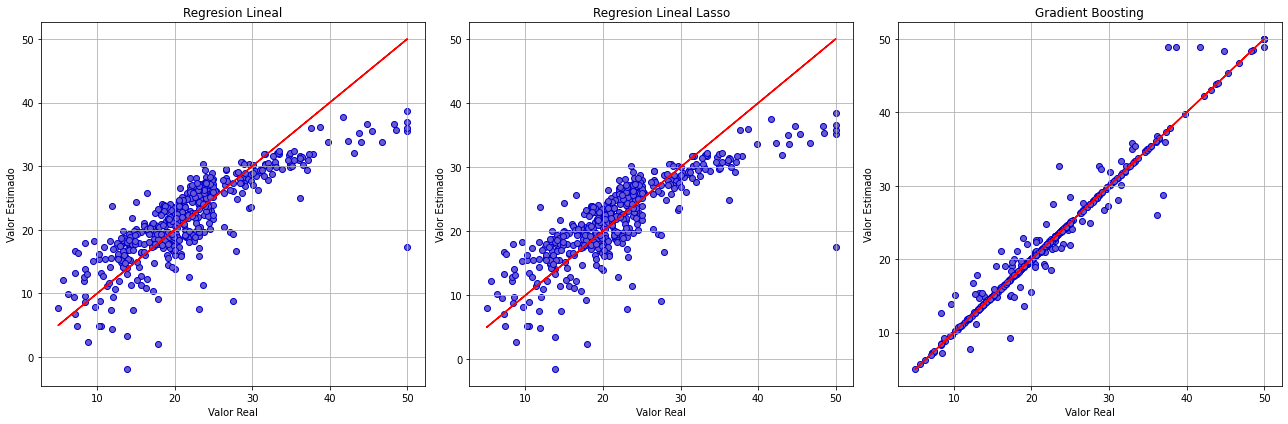

In [ ]:
X = df2[["INDUS","RM","TAX","LSTAT"]]
y = df2[["MEDV"]]
X1 = scl1.transform(X) 

#Modelos escogidos
lr=LR[17]
Llr=LLR[17]
gb=GB[3]

#Estimacion modelo escogido
y_pred1=lr.predict(X1)
y_pred2=Llr.predict(X1)
y_pred3=gb.predict(X1)

#Grafico de la estimacion
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

axs[0].scatter(y,y_pred1,color="slateblue",edgecolor="mediumblue")
axs[0].plot(y,y,color="red")
axs[0].set_xlabel('Valor Real')
axs[0].set_ylabel('Valor Estimado')
axs[0].set_title('Regresion Lineal')
axs[0].grid(True)

axs[1].scatter(y,y_pred2,color="slateblue",edgecolor="mediumblue")
axs[1].plot(y,y,color="red")
axs[1].set_xlabel('Valor Real')
axs[1].set_ylabel('Valor Estimado')
axs[1].set_title('Regresion Lineal Lasso')
axs[1].grid(True)
    

axs[2].scatter(y,y_pred3,color="slateblue",edgecolor="mediumblue")
axs[2].plot(y,y,color="red")
axs[2].set_xlabel('Valor Real')
axs[2].set_ylabel('Valor Estimado')
axs[2].set_title('Gradient Boosting')
axs[2].grid(True)

plt.tight_layout()

La recta roja indica cuando valor_real=valor_estimado, por tanto las estimaciones (en azul) deberían posicionarse lo más cerca de la recta roja. El modelo obtenido por GradientBoosting tiene mejor estimación en comparación con los de regresión lineal.

In [ ]:
gb

GradientBoostingRegressor(loss='ls', max_depth=6, max_features=4,
                          n_estimators=300)

<font color='red'>**FIN SOLUCIÓN PROBLEMA 1**</font>

## <font color='blue'>**Set de Datos Fake News**</font>

Inspiración
¿Se puede usar este dataset para generar un algoritmo que identifique "fake news" y "real news"?

https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

**Referencias** 

*   Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
*   Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).






Revise los datos que se encuentran en el archivo **Dataset_fakenews.zip**. Realice un analisis descriptivo de los datos, genere las transformaciones necesarias para preparar su dataset para algoritmos de clasificacion y pruebe con todos los modelos de clasificacion revisados en clases. Optimice los parametros de su algoritmo y reporte el F1 de 20 corridas experimentales con 5 fold cross validation. 

Explique sus decisiones, genere visualizaciones y conclusiones.

<font color='red'>**SOLUCIÓN PROBLEMA 2:**</font>

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain, plot_precision_recall, plot_lift_curve

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Eliminaremos las palabras que no contribuyen a la clasificación usando un diccionario de stopwords:

In [ ]:
import nltk
nltk.download('stopwords');
from nltk.corpus import stopwords;
stopwords = stopwords.words('english') + ['of','the','to','be','that','with','on','for','by','at','one', 's', 't', 'n', 'nt', 'don', 'doesn'];

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#importamos los datos y creamos una columna extra correspondiente a la clase Fake o True
TFake = pd.read_csv('/content/drive/MyDrive/Diplomado/Dataset_fakenews/Fake.csv');
TFake['Response'] = np.zeros(len(TFake)).astype(int);

TTrue = pd.read_csv('/content/drive/MyDrive/Diplomado/Dataset_fakenews/True.csv');
TTrue['Response'] = np.ones(len(TTrue)).astype(int);


In [ ]:
#Como ambos dataframes tienen la misma estructura los combinamos en un mismo dataframe:
df = pd.concat([TFake, TTrue], ignore_index=True);
df.Response = df.Response.astype('category');

#Dejamos todo en minúscula...
df['title'] = df['title'].str.lower()
df['text'] = df['text'].str.lower()

#... y removemos signos de puntuación, números:
df['title'] = df['title'].str.replace('[^\w\s]', '')
df['title']=df['title'].str.replace('\d+','')
df['title']=df['title'].str.replace('\n','').replace('\r',"")

df['text']=df['text'].str.replace('[^\w\s]','')
df['text']=df['text'].str.replace('\d+','')
df['text']=df['text'].str.replace('\n','').replace('\r',"")

#print(df.head())

#las palabras del título podemos combinarlas con el texto para generar un sólo paquete de palabras para cada datapoint.
df['text_combined'] = df['title'] + df['text'];



##Análisis Descriptivo:

In [ ]:
#Veamos cómo se ven las noticias que tenemos:
import random
bFake = list(df.text[df.Response == 0]);
bTrue = list(df.text[df.Response == 1]);

print(f'La siguiente noticia es Fake: \n {random.choice(bFake)} \n')
print(f'La siguiente noticia es Verdadera: \n {random.choice(bTrue)}')


La siguiente noticia es Fake: 
 president trump tweeted that he was considering removing bailouts and forcing congress to pay for their health insurance at the same rates as the rest of the country below dr michael siegel and michael needham below discuss how trump can take the obamacare exemption from congressmichael needham appeared on fox weekend news to discuss the possibility of president trump removing taxpayer funded subsidies for individual members of congress and their staff that allows them to avoid feeling the cost of obamacarehe states that this tweet could put the right pressure on congress to come to a decision by making them  feel the full impact of the premium increases that the american people are feeling  the american people are tired of washington playing by different rules in order to escape the skyrocketing premiums and other disadvantages of obamacare congress defined itself as a  small business  which would entail an organization that employs fifty people or less

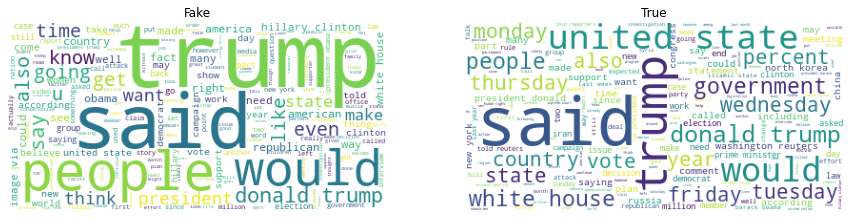

In [ ]:
#Usemos un wordcloud para visualizar el tipo de palabras más presente en las noticias
wc=WordCloud(background_color='white',stopwords=stopwords)

fig, ax = plt.subplots(1,2,figsize=(15,10))
wc.generate(' '.join(bFake))
ax[0].imshow(wc)
ax[0].axis("off")
ax[0].set_title('Fake');

wc.generate(' '.join(bTrue))
ax[1].imshow(wc)
ax[1].axis("off")
ax[1].set_title('True');
plt.show();


Podemos ver que las Fake News tienen 4 palabras que se repiten con más frecuencia como Trump (la con más frecuencia), people, would, said, que pueden ser palabras que llaman la atención de un público amplio. Esas mismas palabras se encuentras también en las noticias verdaderas, sin embargo tienen una frecuencia más homogénea, compartida con varias otras palabras de índole político.

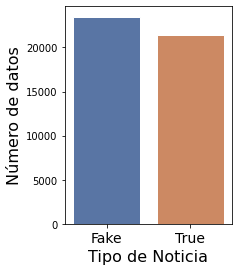

In [ ]:
#Evaluemos si los datos están balanceados usando un countplot:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
sns.set_theme(style="whitegrid")
sns.countplot(data = df, x = 'Response', ax = ax)
ax.set_xlabel('Tipo de Noticia', fontsize = 16)
ax.set_ylabel('Número de datos', fontsize = 16)
ax.set_xticklabels(['Fake', 'True'], fontsize = 14);
plt.show()

El dataset completo está bastante bien balanceado.

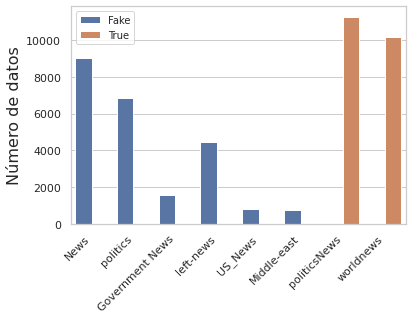

In [ ]:
#Cantidad de datos por tema:
sns.countplot(df['subject'],hue='Response',data=df)
x_labels = np.unique(df.subject);
plt.xticks(rotation=45, ha = 'right');
plt.xlabel('', fontsize = 16)
plt.ylabel('Número de datos', fontsize = 16)
plt.legend(['Fake', 'True'], fontsize = 10);
plt.show()

Podemos ver en el gráfico que la mayoría de las fake news provienen de noticias clasificadas como noticias generales o política, sin emabrgo una no menor cantidad vienen de tópicos polarizados (en este caso noticias de Izquierda). Por otro lado, las noticias verdaderas vienen con gran frequencia de tópicos de politica o noticias del mundo

In [ ]:
#Formamos separamos los predictores de la respuesta:
#La fecha no nos aporta mucha información acerca si una noticia es falsa o verdadera, por lo tanto la dejamos fuera
X = df[['text_combined']] 
y = df.Response

n_runs = 20;
k_folds = 5;

##Análisis Predictivo:

In [ ]:
def runPredictionAnalysis(model, n_runs = 20, k_folds = 5):
  #Corremos el modelo 20 veces con 5-fold cross-validation:
  F1_0 = [];
  F1_1 = [];
  Acc = [];
  for ix in range(n_runs):
    print(f'Corrida # {ix}');
    f1_0 = [];
    f1_1 = [];
    acc = []
    #Usamos 5-fold cross-validation:
    kf = KFold(n_splits=k_folds, shuffle=True)
    for k, (train_index, test_index) in enumerate(kf.split(X.text_combined, y)):
        print(f'-- validation {k}')
        #Separamos en training y test sets:
        x_train, x_test = X.text_combined.iloc[train_index], X.text_combined.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(x_train, y_train);

        y_pred = model.predict(x_test)
        y_prob = model.predict_proba(x_test)

        rep = classification_report(y_test, y_pred, output_dict = True);
        f1_0.append([rep['0']['f1-score'], ix]);
        f1_1.append([rep['1']['f1-score'], ix]); 
        acc.append([rep['accuracy'], ix]);
    #print(f'Accuracy en la corrida {ix} es {partial_mean(acc)}')
    F1_0.append([partial_mean(f1_0), ix]);
    F1_1.append([partial_mean(f1_1), ix]);
    Acc.append([partial_mean(acc), ix]);

  #return the collected accuracy and F1 for both classes, as well as the last train/test sets:
  print('Done!');  
  return Acc, F1_0, F1_1, model, x_train, x_test, y_train, y_test

def partial_mean(h):
  a=np.array(h);
  pm = a[:,0].mean();
  return pm 

def plotPerformance(y_test, y_pred, F1_0, F1_1, Acc):
  #Plotting:
  fig, ax = plt.subplots(1,2,figsize = (15,6));

  #Plot confusion matrix:
  mat = confusion_matrix(y_test, y_pred)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True, cmap='inferno_r', ax = ax[0])
  ax[0].set_xlabel('True label')
  ax[0].set_ylabel('Predicted label');
  ax[0].set_title('Desempeño del modelo')

  #F1 report and Accuracy:
  dfF0 = pd.DataFrame(F1_0, columns = ['val', 'run']);
  dfF1 = pd.DataFrame(F1_1, columns = ['val', 'run']);
  dfAcc = pd.DataFrame(Acc, columns = ['val', 'run']);

  sns.lineplot(data = dfF0, x = 'run', y = 'val', markers=True, ax = ax[1])
  sns.lineplot(data = dfF1, x = 'run', y = 'val', markers=True, ax = ax[1])
  sns.lineplot(data = dfAcc, x = 'run', y = 'val', markers=True, ax = ax[1])
  ax[1].legend(['Fake F1', 'True F1', 'Accuracy'])
  ax[1].set_xlabel('Corrida #');
  ax[1].set_title('Curvas de Desempeño')

  plt.show();

  print(f'El modelo alcanzó una accuracy final de {dfAcc.val.iloc[-1]:.3f}')
  print(f'El F1 final para la clasificación de Fake News fue {dfF0.val.iloc[-1]:.3f}')
  print(f'El F1 final para la clasificación de True News fue {dfF1.val.iloc[-1]:.3f}')


### * Naive Bayes Multinomial

Corrida # 0
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 1
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 2
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 3
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 4
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 5
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 6
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 7
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 8
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 9
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 10
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- 

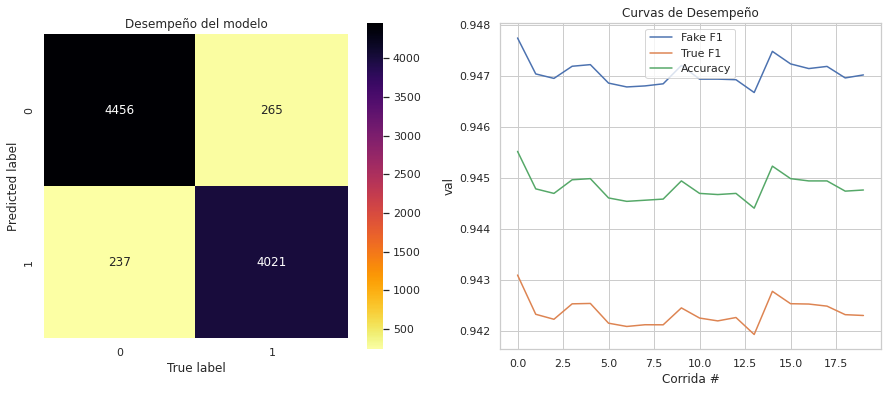

El modelo alcanzó una accuracy final de 0.945
El F1 final para la clasificación de Fake News fue 0.947
El F1 final para la clasificación de True News fue 0.942


In [ ]:
#generamos el modelo junto al vectorizer usando el filtro de stopwords:
model = make_pipeline(TfidfVectorizer(stop_words = stopwords), MultinomialNB())

#Entrenamos el modelo varias veces con cross-validation:
Acc, F1_0, F1_1, fit_model, x_train, x_test, y_train, y_test = runPredictionAnalysis(model, n_runs = n_runs, k_folds = k_folds);

#Reporte de Accuracy y F1 con el modelo final:
y_pred = fit_model.predict(x_test);
plotPerformance(y_test, y_pred, F1_0, F1_1, Acc);


### * Regresión Logistica:

Corrida # 0
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 1
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 2
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 3
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 4
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 5
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 6
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 7
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 8
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 9
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 10
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- 

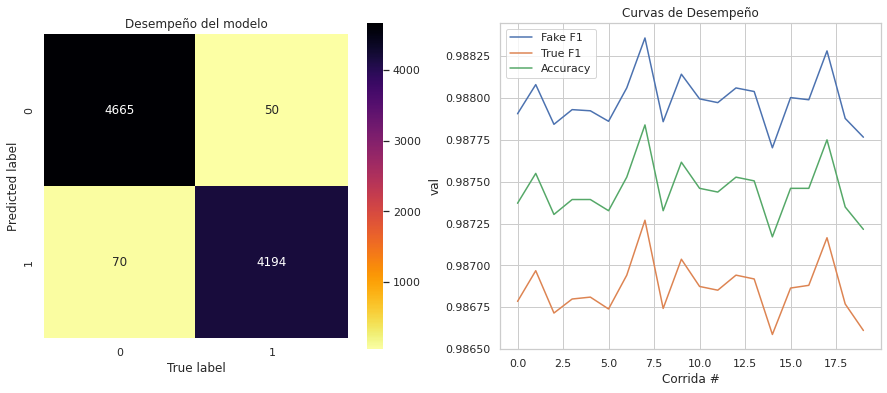

El modelo alcanzó una accuracy final de 0.987
El F1 final para la clasificación de Fake News fue 0.988
El F1 final para la clasificación de True News fue 0.987


In [ ]:
from sklearn.linear_model import LogisticRegression


#generamos el modelo junto al vectorizer usando el filtro de stopwords:
model = make_pipeline(TfidfVectorizer(stop_words = stopwords), LogisticRegression())

#Entrenamos el modelo varias veces con cross-validation:
Acc, F1_0, F1_1, fit_model, x_train, x_test, y_train, y_test = runPredictionAnalysis(model, n_runs = n_runs, k_folds = k_folds);

#Reporte de Accuracy y F1 con el modelo final:
y_pred = fit_model.predict(x_test);
plotPerformance(y_test, y_pred, F1_0, F1_1, Acc);



### * Arboles de Decision y Random Forest:

Corrida # 0
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 1
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 2
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 3
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 4
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 5
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 6
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 7
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 8
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 9
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 10
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- 

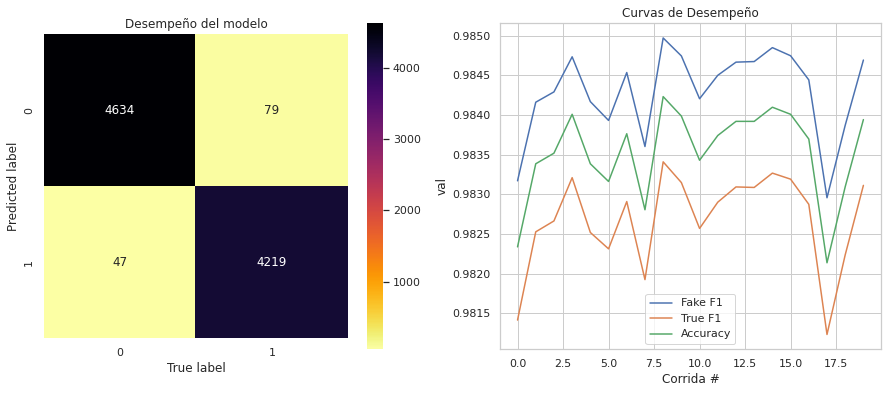

El modelo alcanzó una accuracy final de 0.984
El F1 final para la clasificación de Fake News fue 0.985
El F1 final para la clasificación de True News fue 0.983


In [ ]:
from sklearn.tree import DecisionTreeClassifier

#generamos el modelo junto al vectorizer usando el filtro de stopwords:
model = make_pipeline(TfidfVectorizer(stop_words = stopwords), DecisionTreeClassifier())

#Entrenamos el modelo varias veces con cross-validation:
Acc, F1_0, F1_1, fit_model, x_train, x_test, y_train, y_test = runPredictionAnalysis(model, n_runs = n_runs, k_folds = k_folds);

#Reporte de Accuracy y F1 con el modelo final:
y_pred = fit_model.predict(x_test);
plotPerformance(y_test, y_pred, F1_0, F1_1, Acc);


Entre los 3 modelos escogidos, un modelo de Regresión Logística tuvo un mejor desempeño para clasificar Fake y True News. El modelo de árboles de decisión también tuvo un buen desempeño a pesar de usar los parámetros por defecto, eso sugiere que con parámetros óptimos podría tener un desempeño incluso mejor. Por ejemplo, el modelo Random Forest (adicional) que también usa árboles de decisión, tuvo una accuracy incluso mejor que la RL, pero con un tiempo de computación mucho mayor. Cabe resaltar que en todos los modelos, la clasificación de True News fue la que peor accuracy tuvo, sin embargo el margen podría ser despreciable.

### <font color = red> Experimentos Adicionales:

### K-Nearest Neighbors KNN:

Corrida # 0
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 1
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 2
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 3
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 4
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 5
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 6
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 7
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 8
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 9
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 10
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- 

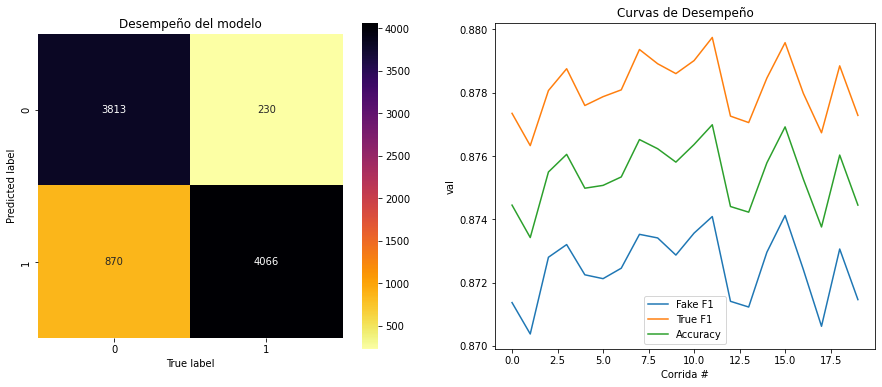

El modelo alcanzó una accuracy final de 0.874
El F1 final para la clasificación de Fake News fue 0.871
El F1 final para la clasificación de True News fue 0.877


In [ ]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors);

#generamos el modelo junto al vectorizer usando el filtro de stopwords:
model = make_pipeline(TfidfVectorizer(stop_words = stopwords), knn)

#Entrenamos el modelo varias veces con cross-validation:
Acc, F1_0, F1_1, fit_model, x_train, x_test, y_train, y_test = runPredictionAnalysis(model, n_runs = n_runs, k_folds = k_folds);

#Reporte de Accuracy y F1 con el modelo final:
y_pred = fit_model.predict(x_test);
plotPerformance(y_test, y_pred, F1_0, F1_1, Acc);

### * Arboles de Decision y Random Forest:

Corrida # 0
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 1
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 2
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 3
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 4
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 5
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 6
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 7
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 8
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 9
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- validation 4
Corrida # 10
-- validation 0
-- validation 1
-- validation 2
-- validation 3
-- 

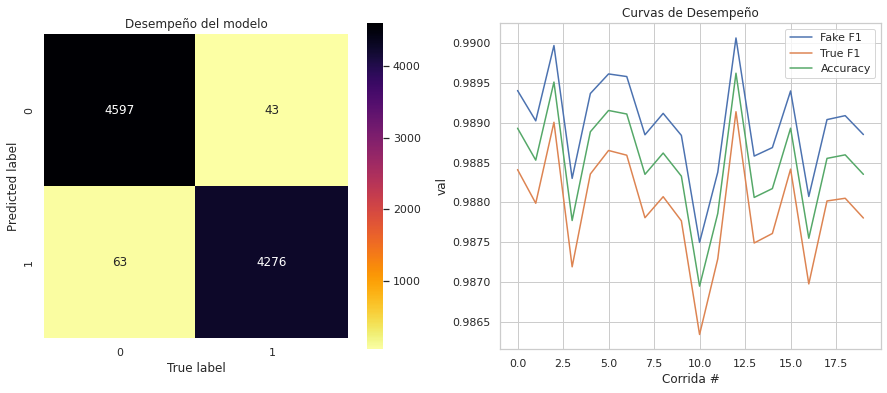

El modelo alcanzó una accuracy final de 0.988
El F1 final para la clasificación de Fake News fue 0.989
El F1 final para la clasificación de True News fue 0.988


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#generamos el modelo junto al vectorizer usando el filtro de stopwords:
model = make_pipeline(TfidfVectorizer(stop_words = stopwords), RandomForestClassifier(n_estimators=100, random_state=0))

#Entrenamos el modelo varias veces con cross-validation:
Acc, F1_0, F1_1, fit_model, x_train, x_test, y_train, y_test = runPredictionAnalysis(model, n_runs = n_runs, k_folds = k_folds);

#Reporte de Accuracy y F1 con el modelo final:
y_pred = fit_model.predict(x_test);
plotPerformance(y_test, y_pred, F1_0, F1_1, Acc);


#### <font color = red> fin experimentos adicionales

<font color='red'>**FIN SOLUCIÓN PROBLEMA 2**</font>

## <font color='blue'>**Set de Datos Tarjetas de Créditos**</font>

Utilizaremos un conjunto de datos real de transacciones anónimas con tarjetas de crédito realizadas por titulares de tarjetas europeos a partir de septiembre de 2013. Estas transacciones están etiquetadas como fraudulentas o genuinas, y el objetivo es crear una solución de detección de fraudes utilizando el aprendizaje automático para predecir las etiquetas correctas para nuevas instancias.
Este conjunto de datos está muy desequilibrado. De las 284.807 transacciones, solo 492 son fraudulentas (0,172%). Este bajo porcentaje de fraude es bastante típico de las transacciones con tarjeta de crédito. Hay 28 variables, todas ellas numéricas, y no hay variables categóricas. Estas variables no son las características originales, sino el resultado de un análisis de componentes principales.

Utilizaremos un conjunto de datos real de transacciones anónimas con tarjetas de crédito realizadas por titulares de tarjetas europeos a partir de septiembre de 2013. Estas transacciones están etiquetadas como fraudulentas o genuinas, y el objetivo es crear una solución de detección de fraudes utilizando el aprendizaje automático para predecir las etiquetas correctas para nuevas instancias.
Este conjunto de datos está muy desequilibrado. De las 284.807 transacciones, solo 492 son fraudulentas (0,172%). Este bajo porcentaje de fraude es bastante típico de las transacciones con tarjeta de crédito. Hay 28 variables, todas ellas numéricas, y no hay variables categóricas. Estas variables no son las características originales, sino el resultado de un análisis de componentes principales.

Para lidiar con datasets desbalanceados se recomienda utilizar la libreria imblearn. En ella hay varios metodos para balancear los datos. Existe un método de submuestreo y otro de sobremuestreo (SMOTE). 

<font color='red'>**SOLUCIÓN PROBLEMA 3:**</font>

## 1.- Importación de la Data

In [ ]:
# importamos las librerías básicas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import imblearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix

%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importamos el set de datos
df_CC = pd.read_csv('/content/drive/MyDrive/Diplomado en Ciencia de Datos UDD/Módulo 6 - (A07130-1) APRENDIZAJE SUPERVISADO/Data/credit_card.txt')

Realizamos un breve exploración de la data principalmente para entender que hay en el data set y validar que no hayan datos nulos.

In [ ]:
df_CC.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df_CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

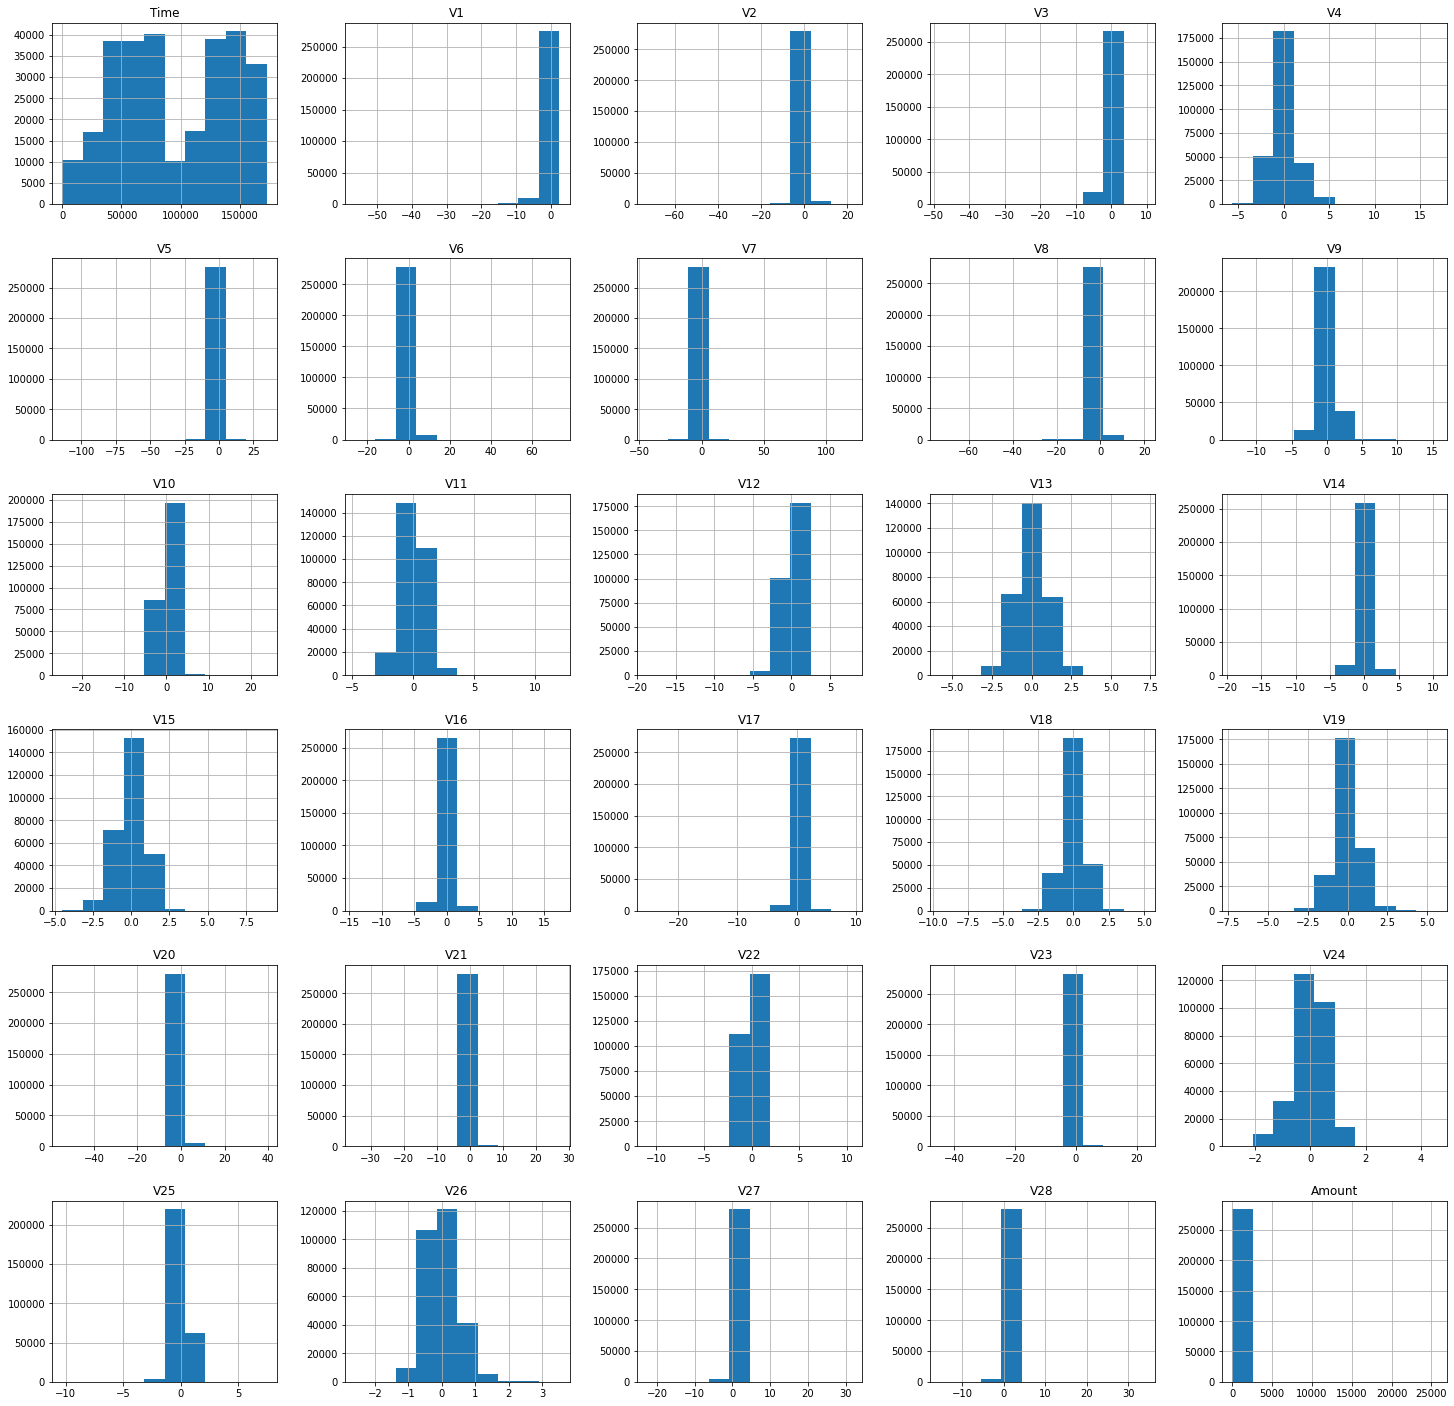

In [ ]:
df_CC.drop('Class', axis = 1).hist(figsize = (25,25))
plt.show()

Como se puede observar cada variable tiene distintos ordenes de magnitud, especialmente la variable Amount y Time es por ello que es necesario escalar la data para evitar que estas variables cocentren protagonismo a la hora de realizar el modelo de clasificación.

Por ultimo se mostrará como se distribuye la variable Class.

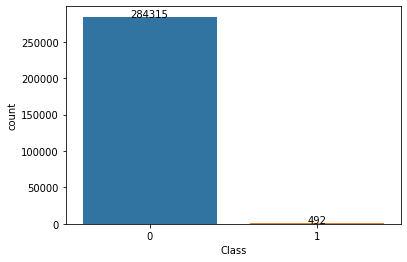

In [ ]:
ax = sns.countplot(data = df_CC, x = 'Class')

for p in ax.patches:
    ax.annotate('{0:}'.format(p.get_height()),
                xy = (p.get_x() + 0.4 , p.get_height()),
                ha='center')
    
plt.show()

En el gráfico se puede observar el claro desbalance entre la categoría "no fraude" y "fraude".

## 2.- Escalamiento y Over-Under Sampling de la Data

In [ ]:
#Dividimos el data frame
y = df_CC['Class']
x = df_CC.drop('Class', axis = 1)

In [ ]:
#Estandarizamos nuestro data frame que contiene la data para predecir si la transacción
#es o no fraude, ya que se puede ver como las variables tienen diferentes magnitudes

from sklearn.preprocessing import MinMaxScaler

MinMax = MinMaxScaler() # object of the class StandardScaler ()
x_scaled = MinMax.fit_transform(x.values)

In [ ]:
# dividimos en data de train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.30, random_state = 42)

In [ ]:
# exportamos las funciones que nos ayudarán a realizar el resampling de la data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [ ]:
# definimos el pipeline para realizar over y under sampling a la vez
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

In [ ]:
# transformamos el data set solo para el conjunto de entrenamiento
X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
# summarize the new class distribution
counter_train = Counter(y_train)
print(counter_train)

Counter({0: 199008, 1: 356})


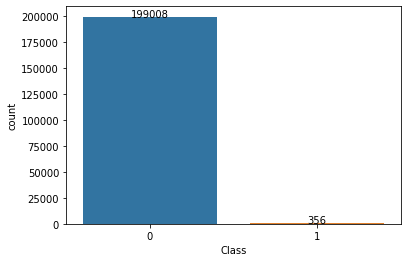

In [ ]:
#Miramos graficamente como luce la data previo al resampling
ax = sns.countplot(data = pd.DataFrame(y_train, columns = ['Class']), x = 'Class')

for p in ax.patches:
    ax.annotate('{0:}'.format(p.get_height()),
                xy = (p.get_x() + 0.4 , p.get_height()),
                ha='center')
    
plt.show()

In [ ]:
counter_train_res = Counter(y_train_res)
print(counter_train_res)

Counter({0: 39800, 1: 19900})


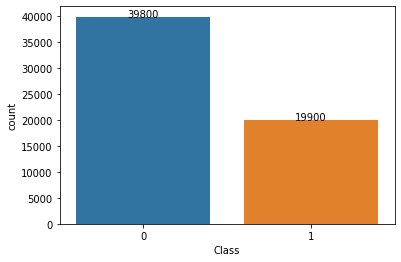

In [ ]:
#Miramos graficamente como luce la data post resampling
ax = sns.countplot(data = pd.DataFrame(y_train_res, columns = ['Class']), x = 'Class')

for p in ax.patches:
    ax.annotate('{0:}'.format(p.get_height()),
                xy = (p.get_x() + 0.4 , p.get_height()),
                ha='center')
    
plt.show()

## 3.- Modelos de Clasificación
### 3.1.- Logistic Regression

In [ ]:
# Importamos el clasificador
from sklearn.linear_model import LogisticRegression 

In [ ]:
# Entrenamos el modelo
lr = LogisticRegression(C=1e+3, solver='liblinear', max_iter=2)
lr.fit(X_train_res, y_train_res) 

LogisticRegression(C=1000.0, max_iter=2, solver='liblinear')

In [ ]:
# Realiazmos una predicción
y_pred_lr = lr.predict(X_test)

In [ ]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_lr , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_lr)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_lr)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_lr)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr)))

Accuracy :0.99923
AUC : 0.90051
Precision : 0.73649
Recall : 0.80147
F1 : 0.76761


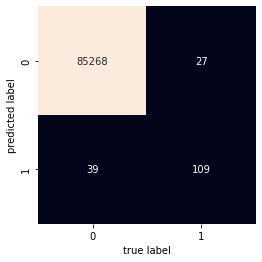

In [ ]:
#Creamos una matriz de confución
mat_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(mat_lr.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

### 3.2.- Decision Tree

In [ ]:
# Importamos el clasificador
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Entrenamos el modelo
tree = DecisionTreeClassifier().fit(X_train_res, y_train_res) 

In [ ]:
# Realiazmos una predicción
y_pred_tree = tree.predict(X_test)

In [ ]:
# Imprimimos las metricas
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_tree , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_tree)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_tree)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_tree)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_tree)))

Accuracy :0.96572
AUC : 0.94980
Precision : 0.04168
Recall : 0.93382
F1 : 0.07980


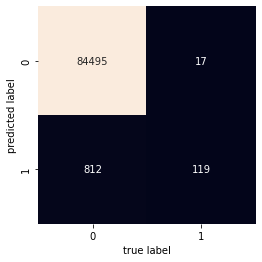

In [ ]:
#Creamos una matriz de confución
mat_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(mat_tree.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

### 3.3.- Knearest Neighbor

In [ ]:
# Importamos el clasificador
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Entrenamos el modelo
n_neighbors = 4

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_res, y_train_res) 

KNeighborsClassifier(n_neighbors=4)

In [ ]:
# Realiazmos una predicción
y_pred_knn = knn.predict(X_test)

In [ ]:
# Imprimimos las metricas
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred_knn , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_knn)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_knn)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_knn)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_knn)))

Accuracy :0.99489
AUC : 0.94238
Precision : 0.22284
Recall : 0.88971
F1 : 0.35641


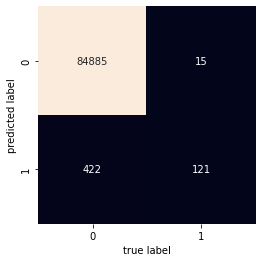

In [ ]:
#Creamos una matriz de confución
mat_tree = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(mat_tree.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');

## 3.- Curva Precision - Recall

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scikitplot.metrics import plot_precision_recall

### 3.1.- Logistic Regression

In [ ]:
y_proba_lr = lr.predict_proba(X_test)

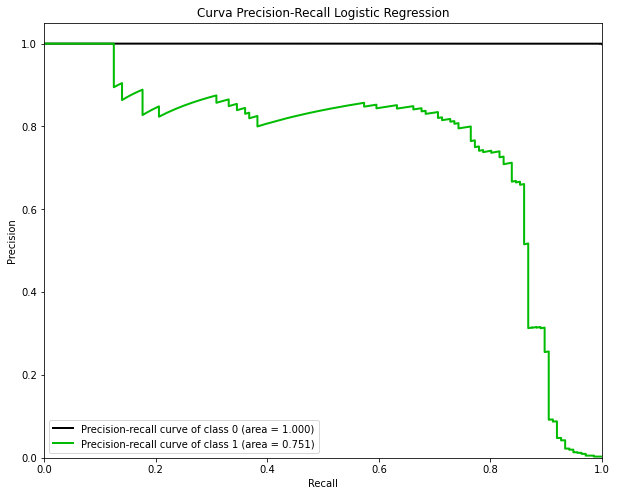

In [ ]:
plot_precision_recall(y_test, y_proba_lr, title = 'Curva Precision-Recall Logistic Regression'
, plot_micro = False, classes_to_plot = [0,1], figsize = (10,8))
plt.show()

### 3.2.- Decision Tree

In [ ]:
y_proba_tree = tree.predict_proba(X_test)

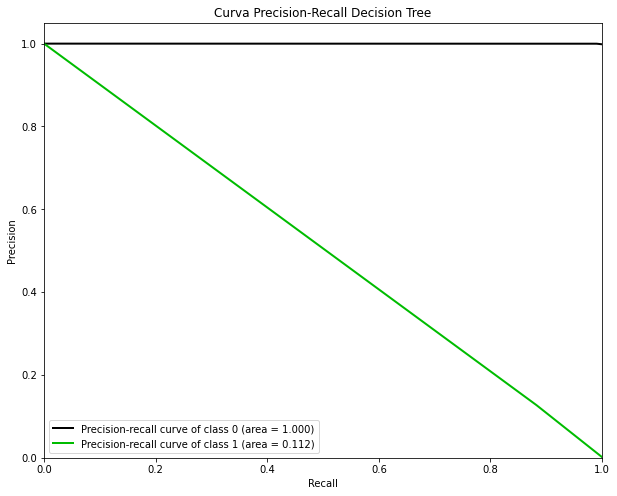

In [ ]:
plot_precision_recall(y_test, y_proba_tree, title = 'Curva Precision-Recall Decision Tree'
, plot_micro = False, classes_to_plot = [0,1], figsize = (10,8))
plt.show()

### 3.3.- Knearest Neighbor

In [ ]:
y_proba_knn = knn.predict_proba(X_test)

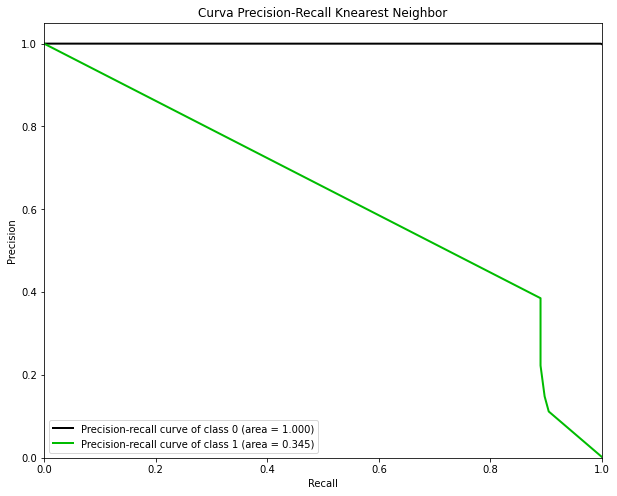

In [ ]:
plot_precision_recall(y_test, y_proba_knn, title = 'Curva Precision-Recall Knearest Neighbor'
, plot_micro = False, classes_to_plot = [0,1], figsize = (10,8))
plt.show()

En general tanto por el lado de las metricas como por lo observado en las curvas de precision-recall el modelo que mejor performa en este caso es Logistic Regrssion equilibrando tanto el recall como la presicion y dejando un poco de lado el accuracy dado lo desbalanceado de la muestra (tiende a ser buena independiente del modelo dado lo predominante de la clase "No fraude").

<font color='red'>**FIN SOLUCIÓN PROBLEMA 3**</font>